<a href="https://colab.research.google.com/github/chandrakanta-chaudhury/Machine-Learning/blob/master/omnilytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
trend_df=pd.read_csv("/content/drive/My Drive/trends1.csv", index_col=0, parse_dates=True)
predictions_df=pd.read_csv("/content/drive/My Drive/predictions.csv", index_col=0, parse_dates=True)

In [15]:
trend_df.head()


,top 1,top 2,top 3,date
0,4,14,14,2012-10-07
1,7,15,18,2012-10-14
2,5,12,15,2012-10-21
3,5,15,12,2012-10-28
4,4,12,12,2012-11-04


In [32]:
trend_df.tail()

,top 1,top 2,top 3,date
256,18,72,35,2017-09-03
257,17,67,37,2017-09-10
258,18,66,32,2017-09-17
259,19,62,31,2017-09-24
260,20,78,27,2017-10-01


In [16]:
trend_df.columns

Index(['top 1', 'top 2', 'top 3', 'date'], dtype='object')

In [17]:
trend_df=trend_df[['top 1', 'top 2', 'top 3', 'date']]

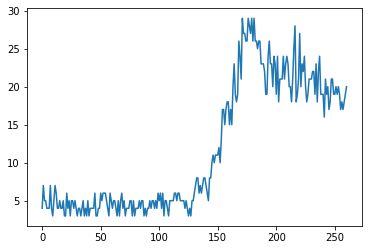

In [18]:
trend_df['top 1'].plot()

In [20]:
import matplotlib.pyplot as plt


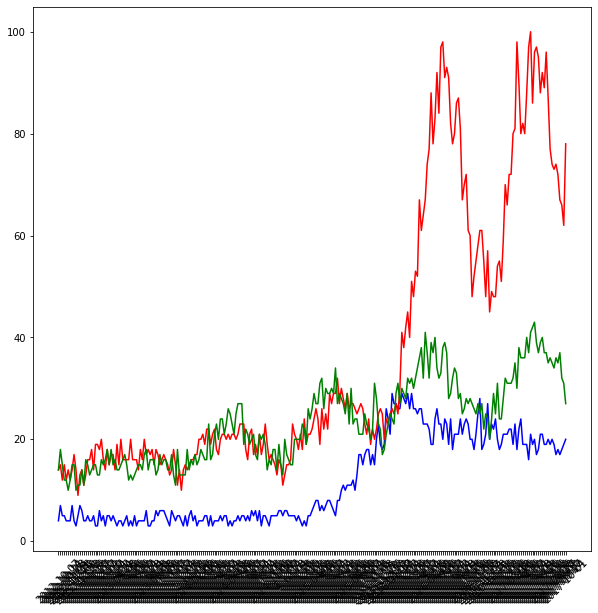

In [31]:
#ax1 = trend_df['top 1'].plot(color='blue', grid=True, label='top 1')
#ax2 = trend_df['top 2'].plot(color='red', grid=True, label='top 2')
#ax3= trend_df['top 3'].plot(color='yellow',grid=True,label='top 3')
fig,ax = plt.subplots(figsize=(10, 10))
ax1=ax.plot(trend_df['date'],trend_df['top 1'],color='blue',label='top 1')
ax2=ax.plot(trend_df['date'],trend_df['top 2'],color='red',label='top 2')
ax3=ax.plot(trend_df['date'],trend_df['top 3'],color='green',label='top 3')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [5]:
trend_df.dtypes
#trend_df['year']=trend_df['date'].year()

top 1     int64
top 2     int64
top 3     int64
date     object
dtype: object

In [6]:
trend_df['date'] = pd.to_datetime(trend_df['date'])

In [7]:
trend_df.dtypes

top 1             int64
top 2             int64
top 3             int64
date     datetime64[ns]
dtype: object

In [14]:
trend_df['year']=trend_df['date'].dt.year

In [16]:
trend_df.tail(5)

,top 1,top 2,top 3,date,year
256,18,72,35,2017-09-03,2017
257,17,67,37,2017-09-10,2017
258,18,66,32,2017-09-17,2017
259,19,62,31,2017-09-24,2017
260,20,78,27,2017-10-01,2017


In [ ]:
#filter out data for  2016 and 2017,so we can check the change in demand  percentage from last year 

In [17]:
trend_df_2016=trend_df[trend_df['year'] >= 2016]

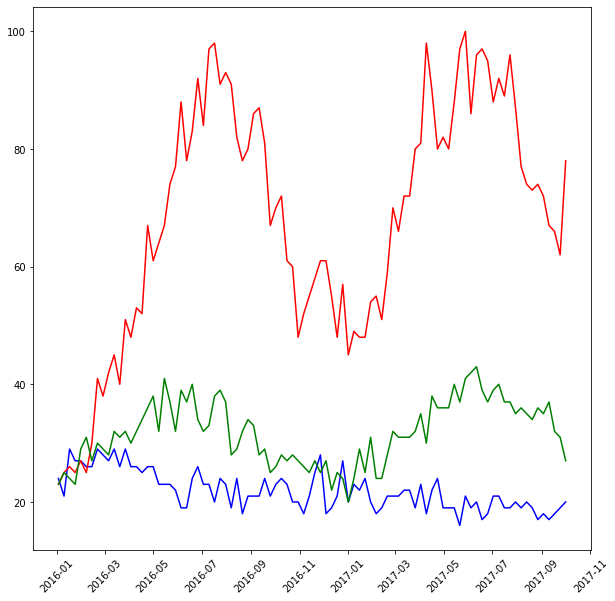

In [21]:
fig,ax = plt.subplots(figsize=(10, 10))
ax1=ax.plot(trend_df_2016['date'],trend_df_2016['top 1'],color='blue',label='top 1')
ax2=ax.plot(trend_df_2016['date'],trend_df_2016['top 2'],color='red',label='top 2')
ax3=ax.plot(trend_df_2016['date'],trend_df_2016['top 3'],color='green',label='top 3')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [30]:
mean_year_demand=trend_df_2016.groupby(['year'],as_index=False).mean()
print(mean_year_demand)

   year      top 1      top 2      top 3
0  2016  23.557692  61.826923  30.384615
1  2017  19.850000  75.850000  33.575000


In [23]:
#from above it seems top 2 is performing better among these 3 categories in 2017 compare to 2016 and 
#top 1 is  worse where demand is low than previous year

In [42]:
#calculate propotion of change in demand from last year
print("% change in top 1 demand : ",((mean_year_demand['top 1'][1] - mean_year_demand['top 1'][0]) / mean_year_demand['top 1'][0]) * 100)
print("% change in top 2 demand : ",((mean_year_demand['top 2'][1] - mean_year_demand['top 2'][0]) / mean_year_demand['top 2'][0]) * 100)
print("% change in top 3 demand : ",((mean_year_demand['top 3'][1] - mean_year_demand['top 3'][0]) / mean_year_demand['top 3'][0]) * 100)
 

% change in top 1 demand :  -15.738775510204073
% change in top 2 demand :  22.681181959564526
% change in top 3 demand :  10.500000000000014


In [43]:
predictions_df.head(5)

,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028
1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460
2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919
3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192
4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650


In [87]:
#for top 1
top1_prediction = predictions_df[['date','fit top 1','fit2 top 1','fit3 top 1']]

In [64]:
top1_prediction.tail(5)

,date,fit top 1,fit2 top 1,fit3 top 1
621,2018-09-27,16.588328,17.507205,17.533665
622,2018-09-28,16.655365,17.567572,17.594394
623,2018-09-29,16.724295,17.629760,17.656862
624,2018-09-30,16.794364,17.693017,17.720324
625,2018-10-01,16.864604,17.756372,17.783823


In [88]:
top1_prediction['org_top1']=trend_df['top 1'].copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
top1_prediction.head(5)

,date,fit top 1,fit2 top 1,fit3 top 1,org_top1
0,2012-10-07,6.464020,6.676299,6.814028,4.0
1,2012-10-14,6.405044,6.553469,6.678460,7.0
2,2012-10-21,5.594880,5.685904,5.801919,5.0
3,2012-10-28,4.556118,4.598339,4.706192,5.0
4,2012-11-04,4.203193,4.200978,4.297650,4.0


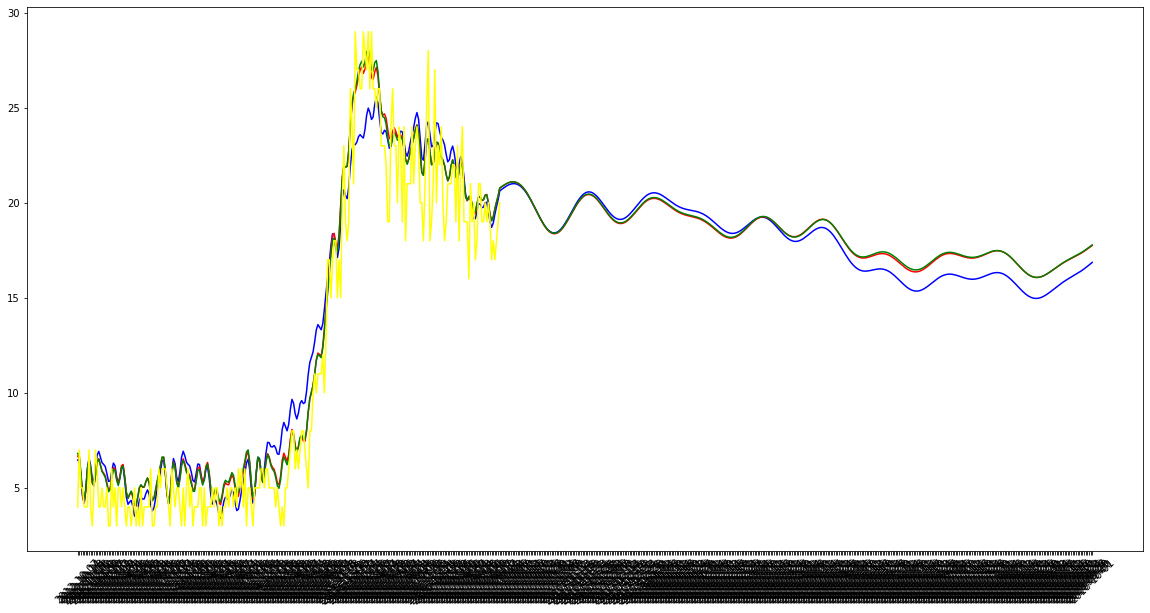

In [55]:
fig,ax = plt.subplots(figsize=(20, 10))
ax1=ax.plot(top1_prediction['date'],top1_prediction['fit top 1'],color='blue',label='fit top 1')
ax2=ax.plot(top1_prediction['date'],top1_prediction['fit2 top 1'],color='red',label='fit2 top 1')
ax3=ax.plot(top1_prediction['date'],top1_prediction['fit3 top 1'],color='green',label='fit3 top 1')
ax4=ax.plot(top1_prediction['date'],top1_prediction['org_top1'],color='yellow',label='Org top 1')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
#from plotting seems red (fit2 top 1 ) and green  (fit3 top 1) are better than fit1 top1 
#lets check the avg mean of the prediction and how it different from the original to capture trend 

In [90]:
top1_prediction['date']=pd.to_datetime(top1_prediction['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
top1_pred=top1_prediction.head(261)

In [92]:
top1_pred.tail(5)

,date,fit top 1,fit2 top 1,fit3 top 1,org_top1
256,2017-09-03,18.932974,19.263615,19.240677,18.0
257,2017-09-10,19.393491,19.681597,19.664230,17.0
258,2017-09-17,19.792739,20.036997,20.028132,18.0
259,2017-09-24,20.156876,20.356717,20.354703,19.0
260,2017-10-01,20.621691,20.774683,20.775169,20.0


In [97]:
top1_pred['year']=top1_pred['date'].dt.year


In [99]:
top1_pred.head()

,date,fit top 1,fit2 top 1,fit3 top 1,org_top1,year
0,2012-10-07,6.464020,6.676299,6.814028,4.0,2012
1,2012-10-14,6.405044,6.553469,6.678460,7.0,2012
2,2012-10-21,5.594880,5.685904,5.801919,5.0,2012
3,2012-10-28,4.556118,4.598339,4.706192,5.0,2012
4,2012-11-04,4.203193,4.200978,4.297650,4.0,2012


In [106]:
#check RMS
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(top1_pred['org_top1'],top1_pred['fit top 1']))
print('RMS of fit1 top 1 against top 1 :', rms)
rms = sqrt(mean_squared_error(top1_pred['org_top1'],top1_pred['fit2 top 1']))
print('RMS of fit2 top 1 against top 1 :', rms)
rms = sqrt(mean_squared_error(top1_pred['org_top1'],top1_pred['fit3 top 1']))
print('RMS of fit3 top 1 against top 1 :', rms)

RMS of fit1 top 1 against top 1 : 2.1492895396899963
RMS of fit2 top 1 against top 1 : 1.7787811132422382
RMS of fit3 top 1 against top 1 : 1.7579881182751556


In [ ]:
#from The above RMS score  fit 3 looks more better than other in forecasting demand for top 1 

In [108]:
#we can do same for top 2 and top 3
#just do data preparation for calcualting RMSE to check 
top23_prediction = predictions_df[['date','fit top 2','fit top 3','fit2 top 3','fit3 top 3','fit2 top 2','fit3 top 2']]
top23_prediction['org_top2']=trend_df['top 2'].copy()
top23_prediction['org_top3']=trend_df['top 3'].copy()
top23_prediction['date']=pd.to_datetime(top23_prediction['date'])
top23_pred=top23_prediction.head(261)
top23_pred['year']=top23_pred['date'].dt.year


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [109]:
top23_pred.head()


,date,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,org_top2,org_top3,year
0,2012-10-07,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,14.0,14.0,2012
1,2012-10-14,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,15.0,18.0,2012
2,2012-10-21,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,12.0,15.0,2012
3,2012-10-28,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,15.0,12.0,2012
4,2012-11-04,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,12.0,12.0,2012


In [110]:
#NOW check RMSE for both top 2 and top 3 and check which forecast is better
rms = sqrt(mean_squared_error(top23_pred['org_top2'],top23_pred['fit top 2']))
print('RMS of fit1 top 2 against top 2 :', rms)
rms = sqrt(mean_squared_error(top23_pred['org_top2'],top23_pred['fit2 top 2']))
print('RMS of fit2 top 2 against top 2 :', rms)
rms = sqrt(mean_squared_error(top23_pred['org_top2'],top23_pred['fit3 top 2']))
print('RMS of fit3 top 2 against top 2 :', rms)
 

RMS of fit1 top 2 against top 2 : 8.334584010749102
RMS of fit2 top 2 against top 2 : 4.403149324014167
RMS of fit3 top 2 against top 2 : 3.6099141287879575


In [ ]:
## from above RMSE score fit 3 looks better than other two for top 2 demand forecast

In [111]:
rms = sqrt(mean_squared_error(top23_pred['org_top3'],top23_pred['fit top 3']))
print('RMS of fit1 top 3 against top 3 :', rms)
rms = sqrt(mean_squared_error(top23_pred['org_top3'],top23_pred['fit2 top 3']))
print('RMS of fit2 top 3 against top 3 :', rms)
rms = sqrt(mean_squared_error(top23_pred['org_top3'],top23_pred['fit3 top 3']))
print('RMS of fit3 top 3 against top 3 :', rms)

RMS of fit1 top 3 against top 3 : 2.9793270764497084
RMS of fit2 top 3 against top 3 : 2.4637826019206166
RMS of fit3 top 3 against top 3 : 2.3682932923910878


In [112]:
## from above RMSE score fit 3 looks better than other two for top 3 demand forecast

## FROM ALL THE  ABOVE RMSE values fit 3 looks better for all (top 1 ,top 2 ,top 3 ) for demand forecast

In [ ]:
#Quantify these predictions into an assessment of how you would expect the demand
 #to change over the next 3, 6, 12 months ?
 #Please create your own predictions based of the three types of tops.
 #Briefly explain your choice of model, and how it performs better or worse than the provided predictions.

In [120]:
# lets check the trend for 2018 to answer on demand for next 3 ,6, 12 months 
predictions_df['date']=pd.to_datetime(predictions_df['date'])
predictions_df['year'] =predictions_df['date'].dt.year
predictions_df_2018=predictions_df[predictions_df['year']==2018]

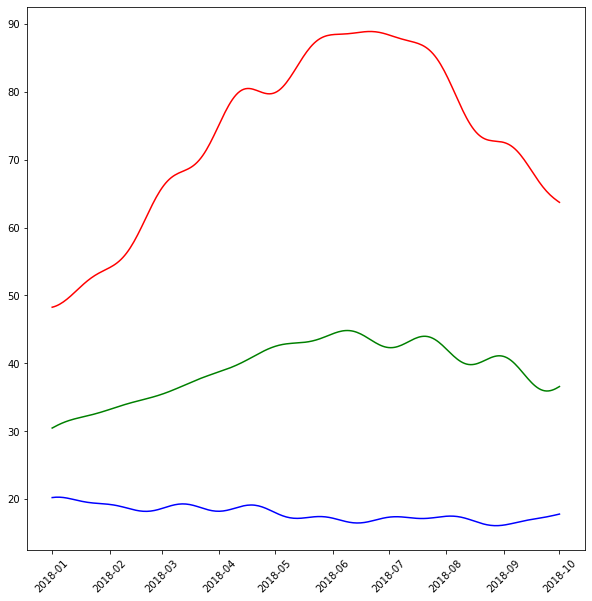

In [122]:
#considering fit3 as it has lowest rmse among all
fig,ax = plt.subplots(figsize=(10, 10))
ax1=ax.plot(predictions_df_2018['date'],predictions_df_2018['fit3 top 1'],color='blue',label='fit3 top 1')
ax2=ax.plot(predictions_df_2018['date'],predictions_df_2018['fit3 top 2'],color='red',label='fit3 top 2')
ax3=ax.plot(predictions_df_2018['date'],predictions_df_2018['fit3 top 3'],color='green',label='fit3 top 3')
#ax4=ax.plot(top1_prediction['date'],top1_prediction['org_top1'],color='yellow',label='Org top 1')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
#from the above plot for 2018 predictions we can infer that demand for top1 is low for next 3 months  and then it 
#almost remains almost remains same and slight increase from april to may period
#and then demand goes down and finally after end of september it picks up

#TOP 2
# for top2 demand keeps increasing for next quarter and it reachs high at june (6 months) and then it demand drops

#TOP 3 
#for top3  it follows same pattern as top 2 , the demand is  increasing for next 6 monhts and
 #from june end it drops  and from july it drops very fast



In [123]:
#for question create own prediction mode
#due to time constraint i will go with very simple model and lets see how it behaves 
#thought the options i do in my projects using hybrid model (ARIMA + ANN / LSTM) it will not be good with the amount of  data we have

#i am skipping the seasonal decompose and trend analysis and moving avg stuffs 

#lets create the data for forecasting ( as our prediction have data till 2018 -10-01) , we will have data till then 
# so we can compare rmse and see if it it either good or bad with predictions we have already 


In [155]:
#lets consider top 1 to check 
trend_top1=trend_df[['date','top 1']]


In [156]:
trend_top1.rename(columns={'date':'ds', 'top 1':'y'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
trend_top1.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [158]:
#using facebooks prophet instead of ARIMA ,due to its inbuilt holiday and trend checking and its baysian
from fbprophet import Prophet

In [260]:
m = Prophet(weekly_seasonality = False,growth='linear',seasonality_mode='multiplicative',seasonality_prior_scale=10)
m.add_seasonality(name='quarterly',period=365.25/4,fourier_order=3,prior_scale=15)
m.add_country_holidays(country_name='MY') # adding country holiday malaysia
m.fit(trend_top1)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [261]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Birth of Prophet,Birth of Prophet_lower,Birth of Prophet_upper,Chinese New Year,Chinese New Year_lower,Chinese New Year_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Eid al-Fitr,Eid al-Fitr_lower,Eid al-Fitr_upper,Feast of the Sacrifice,Feast of the Sacrifice_lower,Feast of the Sacrifice_upper,First Day of Muharram,First Day of Muharram_lower,First Day of Muharram_upper,Good Friday,Good Friday_lower,Good Friday_upper,King's birthday,King's birthday_lower,King's birthday_upper,Labor Day,Labor Day_lower,Labor Day_upper,Malaysia Day,Malaysia Day_lower,Malaysia Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,Tamil New Year,Tamil New Year_lower,Tamil New Year_upper,Wesak Day,Wesak Day_lower,Wesak Day_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,quarterly,quarterly_lower,quarterly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-10-07,4.268990,2.457180,6.504929,4.268990,4.268990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032050,0.032050,0.032050,-0.004837,-0.004837,-0.004837,0.036887,0.036887,0.036887,0.0,0.0,0.0,4.405810
1,2012-10-14,4.270661,2.317284,6.444023,4.270661,4.270661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040828,0.040828,0.040828,0.007789,0.007789,0.007789,0.033039,0.033039,0.033039,0.0,0.0,0.0,4.445023
2,2012-10-21,4.272331,2.476764,6.255320,4.272331,4.272331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014906,0.014906,0.014906,0.042826,0.042826,0.042826,-0.027920,-0.027920,-0.027920,0.0,0.0,0.0,4.336012
3,2012-10-28,4.274001,1.821680,5.881376,4.274001,4.274001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.085610,-0.085610,-0.085610,0.019267,0.019267,0.019267,-0.104877,-0.104877,-0.104877,0.0,0.0,0.0,3.908103
4,2012-11-04,4.275672,1.687546,5.559037,4.275672,4.275672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.163929,-0.163929,-0.163929,-0.044797,-0.044797,-0.044797,-0.119132,-0.119132,-0.119132,0.0,0.0,0.0,3.574766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2018-09-27,14.730617,11.266540,19.162223,11.185691,17.935473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041651,0.041651,0.041651,0.046009,0.046009,0.046009,-0.004357,-0.004357,-0.004357,0.0,0.0,0.0,15.344169
622,2018-09-28,14.719724,11.105832,19.307795,11.161417,17.932807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042343,0.042343,0.042343,0.043536,0.043536,0.043536,-0.001193,-0.001193,-0.001193,0.0,0.0,0.0,15.343000
623,2018-09-29,14.708831,10.845323,19.400041,11.137143,17.930142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042119,0.042119,0.042119,0.039772,0.039772,0.039772,0.002347,0.002347,0.002347,0.0,0.0,0.0,15.328351
624,2018-09-30,14.697938,1

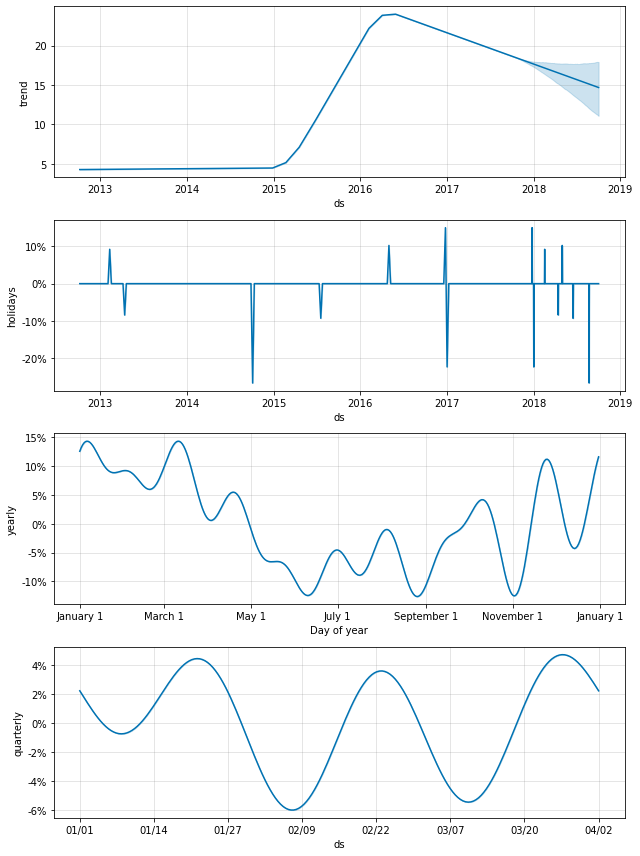

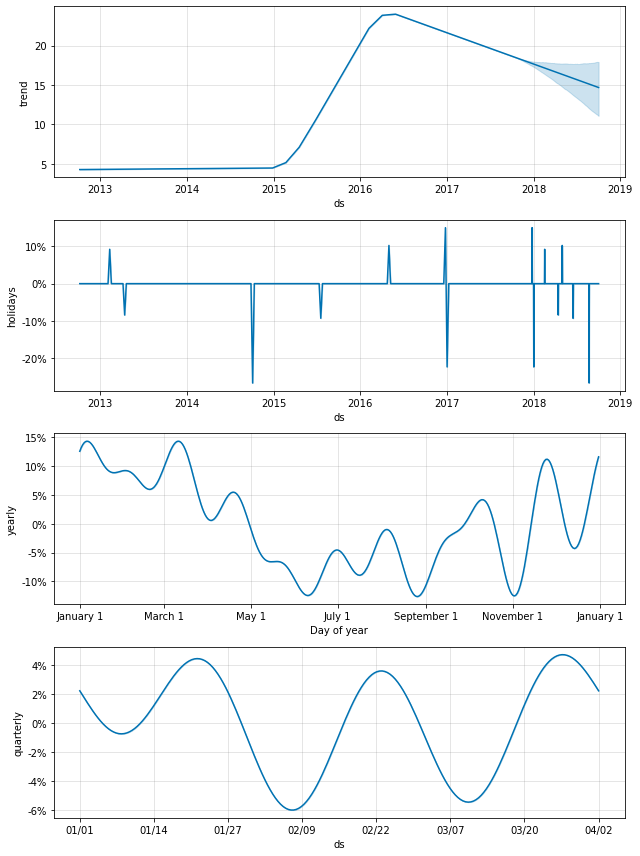

In [262]:
#plot 
m.plot_components(forecast)

In [263]:
#lets check RMSE for TOP1 which forecasted by prophet and with the one in prediction files we have given
#as we have already created datframe top1_pred ,lets use it 
top1_pred['top1_prophet'] =forecast.loc[0:262,'trend']

In [264]:
top1_pred.head()

,date,fit top 1,fit2 top 1,fit3 top 1,org_top1,year,top1_prophet
0,2012-10-07,6.464020,6.676299,6.814028,4.0,2012,4.268990
1,2012-10-14,6.405044,6.553469,6.678460,7.0,2012,4.270661
2,2012-10-21,5.594880,5.685904,5.801919,5.0,2012,4.272331
3,2012-10-28,4.556118,4.598339,4.706192,5.0,2012,4.274001
4,2012-11-04,4.203193,4.200978,4.297650,4.0,2012,4.275672


In [265]:
rms = sqrt(mean_squared_error(top1_pred['org_top1'],top1_pred['fit top 1']))
print('RMS of fit1 top 1 against top   1 :', rms)
rms = sqrt(mean_squared_error(top1_pred['org_top1'],top1_pred['fit2 top 1']))
print('RMS of fit2 top 1 against top   1 :', rms)
rms = sqrt(mean_squared_error(top1_pred['org_top1'],top1_pred['fit3 top 1']))
print('RMS of fit3 top 1 against top   1 :', rms)
rms = sqrt(mean_squared_error(top1_pred['org_top1'],top1_pred['top1_prophet']))
print('RMS of prophet top 1 against top 1 :', rms)

RMS of fit1 top 1 against top   1 : 2.1492895396899963
RMS of fit2 top 1 against top   1 : 1.7787811132422382
RMS of fit3 top 1 against top   1 : 1.7579881182751556
RMS of prophet top 1 against top 1 : 2.034310970820295


In [265]:
#Prophet RMSE is better than fit 1 ,but fit 2 and fit 3 are better than prophet 


In [266]:
#check ARIMA quickly
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [269]:

test_result=adfuller(top1_pred['org_top1'])

In [270]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(top1):
    result=adfuller(top1)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [271]:
adfuller_test(top1_pred['org_top1'])

ADF Test Statistic : -0.9347986049456427
p-value : 0.7762968923279407
#Lags Used : 10
Number of Observations Used : 250
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [272]:
import statsmodels.api as sm

In [347]:
model=sm.tsa.statespace.SARIMAX(top1_pred['org_top1'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
results=model.fit()

In [348]:
predictions_df['forecast']=results.predict(start=261,end=625,dynamic=True)
 

In [349]:
#lets copy trends and future forecasted by SARIMAX to prediction and plot it to check how it is with Fit and fit3 as fit2 and fit3 has low rmse
predictions_df['forecast'][0:261]=trend_df['top 1'].copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [350]:
predictions_df.head(5)

,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1,year,forecast
0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028,2012,4.0
1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460,2012,7.0
2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919,2012,5.0
3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192,2012,5.0
4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650,2012,4.0


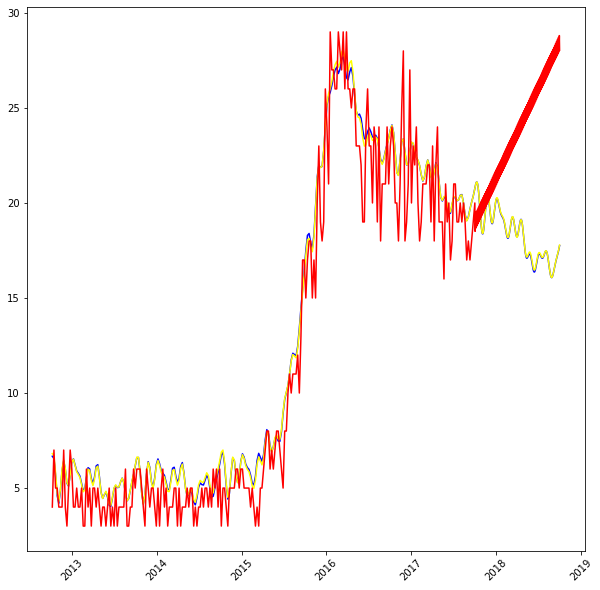

In [351]:
fig,ax = plt.subplots(figsize=(10, 10))
ax1=ax.plot(predictions_df['date'],predictions_df['fit2 top 1'],color='blue',label='fit2 top 1')
ax2=ax.plot(predictions_df['date'],predictions_df['fit3 top 1'],color='yellow',label='fit3 top 1')
ax3=ax.plot(predictions_df['date'],predictions_df['forecast'],color='red',label='forecasted one')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [326]:
#SARIMAX does not look good  , thought i have not optimized P,D,Q values and have not consider ACF and PACF functions